<a href="https://colab.research.google.com/github/Edu-Moreira/Edu-Moreira/blob/main/Curva_de_Juros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install investpy

     |████████████████████████████████| 4.4 MB 4.2 MB/s 
     |████████████████████████████████| 235 kB 65.1 MB/s 
     |████████████████████████████████| 6.4 MB 43.8 MB/s 
     |████████████████████████████████| 503 kB 68.5 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=5687939469d0e913dd3f4edf5852a6d9aef4a4ea9fb095c81d7b2ff5e4c266f2
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import investpy as inv
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
inv.get_bonds('united states')

,country,name,full_name
0,united states,U.S. 30Y,United States 30-Year
1,united states,U.S. 10Y,United States 10-Year
2,united states,U.S. 7Y,United States 7-Year
3,united states,U.S. 5Y,United States 5-Year
4,united states,U.S. 3Y,United States 3-Year
5,united states,U.S. 3M,United States 3-Month
6,united states,U.S. 1Y,United States 1-Year
7,united states,U.S. 6M,United States 6-Month
8,united states,U.S. 1M,United States 1-Month
9,united states,U.S. 2Y,United States 2-Year


In [ ]:
inv.get_bond_recent_data('Brazil 10Y')

,Open,High,Low,Close
Date,,,,
2022-02-09,11.445,11.495,11.445,11.495
2022-02-10,11.565,11.565,11.565,11.565
2022-02-11,11.595,11.595,11.260,11.260
2022-02-15,11.615,11.615,11.280,11.280
2022-02-16,11.515,11.515,11.190,11.190
2022-02-17,11.445,11.555,11.260,11.260
2022-02-18,11.555,11.555,11.260,11.260
2022-02-21,11.445,11.445,11.220,11.220
2022-02-22,11.445,11.485,11.210,11.210


In [ ]:
juros  = inv.get_bonds_overview('brazil')


In [ ]:
juros['last'].iloc[0]-juros['last'].tail(1)

8   -0.098
Name: last, dtype: float64

In [ ]:
juros.index = [93,126,189,252,504,756,1260,2016,2520]
juros['vertices'] = juros.index
juros

,country,name,last,last_close,high,low,change,change_percentage,vertices
93,brazil,Brazil 3M,12.010,11.412,11.412,11.388,+0.598,+5.24%,93
126,brazil,Brazil 6M,12.255,12.255,12.255,12.255,0.000,0.00%,126
189,brazil,Brazil 9M,13.228,12.880,12.880,12.880,+0.348,+2.70%,189
252,brazil,Brazil 1Y,13.181,13.190,13.035,13.035,-0.009,-0.07%,252
504,brazil,Brazil 2Y,12.193,12.885,12.885,12.885,-0.693,-5.37%,504
756,brazil,Brazil 3Y,12.290,12.455,12.380,12.290,-0.165,-1.32%,756
1260,brazil,Brazil 5Y,12.226,12.005,12.260,12.240,+0.221,+1.84%,1260
2016,brazil,Brazil 8Y,12.206,12.205,12.255,12.205,+0.001,+0.01%,2016
2520,brazil,Brazil 10Y,12.108,12.155,12.155,12.155,-0.047,-0.39%,2520


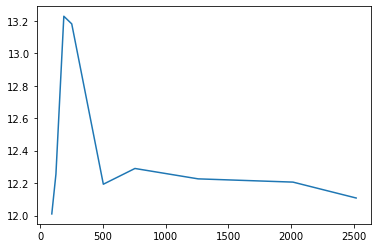

In [ ]:
juros['last'].plot()